In [49]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sn
import matplotlib.pyplot as plt
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.metrics import dtw
import numpy as np

We are trying to categorize classes in each dataset and see which class from source dataset is similar to a particular class from target dataset using DBA and DTW.
DBA provides us with a representative time series for a set of input datapoints of a particular class from the dataset and DTW is used as the algorithm to find similarity between these representative time series vectors.

In [17]:
# !pip install tslearn

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Transfer learning project/UCR_TS_Archive_2015/')

### Taking subset of data

In [46]:
dataset_list = ['50words/50words_TRAIN', 'Meat/Meat_TRAIN', 'HandOutlines/HandOutlines_TRAIN', 
                'InlineSkate/InlineSkate_TRAIN', 'DiatomSizeReduction/DiatomSizeReduction_TRAIN']

datamap = {}
for data_name in dataset_list:
  datamap[data_name] = pd.read_csv(data_name, header=None)

In [47]:
def get_barycenter_per_class(data):
  classes = data[0].value_counts().keys()
  bar_list = {}
  for class_ in classes:
    temp = data[data[0] == class_].iloc[1:, :]
    if temp.shape[0] <= 1:
      bar_list[class_] = np.array([])
    else:  
      bar_list[class_] = dtw_barycenter_averaging(temp, barycenter_size=35)

  return bar_list  

In [48]:
bary_all_data = {}
for name, dt in zip(datamap.keys(), datamap.values()):
  bary_all_data[name] = get_barycenter_per_class(dt)

In [75]:
bary_all_data["50words/50words_TRAIN"].keys()

dict_keys([1, 2, 3, 4, 7, 6, 13, 5, 12, 9, 8, 10, 11, 19, 18, 14, 20, 21, 15, 32, 17, 16, 28, 26, 35, 23, 36, 30, 44, 22, 33, 37, 48, 39, 43, 46, 24, 45, 47, 27, 29, 38, 40, 31, 34, 42, 49, 50, 25, 41])

In [86]:
bary_all_data["Meat/Meat_TRAIN"].keys()

dict_keys([1, 2, 3])

In [97]:
d = {"p": 1}
print(d.get("l"))

None


In [121]:
def get_similarity(sd, td):
  dic_in_dic = {}
  for key1, val1 in zip(sd.keys(), sd.values()):
    if dic_in_dic.get(key1, 0) == 0:
          dic_in_dic[key1] = {}
    for key2, val2 in zip(td.keys(), td.values()):
      if sd[key1].shape != (0,) and td[key2].shape != (0,):   
        dic_in_dic[key1][key2] = dtw(sd[key1].reshape(1, -1), td[key2].reshape(1, -1))

  return pd.DataFrame(dic_in_dic)

 
def get_heatmap(df,  vmax=None,vmin=None):
  fig, ax = plt.subplots(figsize=(14,14))
  sn.heatmap(df, cmap="YlGnBu")  

In [126]:
# Trial
sim_mat = get_similarity(bary_all_data['50words/50words_TRAIN'], bary_all_data["Meat/Meat_TRAIN"])
sim_mat

,1,2,3,4,7,6,13,5,12,9,...,29,38,40,31,34,42,49,50,25,41
1,8.028757,7.272284,8.348104,5.089239,8.700658,10.273488,14.733086,8.602488,13.152827,11.452650,...,28.745023,37.851783,39.696777,31.063413,34.072703,NaN,NaN,NaN,NaN,NaN
2,8.036942,7.153802,8.046527,4.696846,7.931030,9.777272,13.907599,8.118447,12.307379,10.704083,...,27.754316,36.870385,38.709009,30.096706,33.074291,NaN,NaN,NaN,NaN,NaN
3,8.262729,7.265598,8.083252,4.256661,7.448180,9.469610,13.156149,7.858987,11.524843,10.136243,...,26.799854,35.896413,37.731725,29.136894,32.134318,NaN,NaN,NaN,NaN,NaN


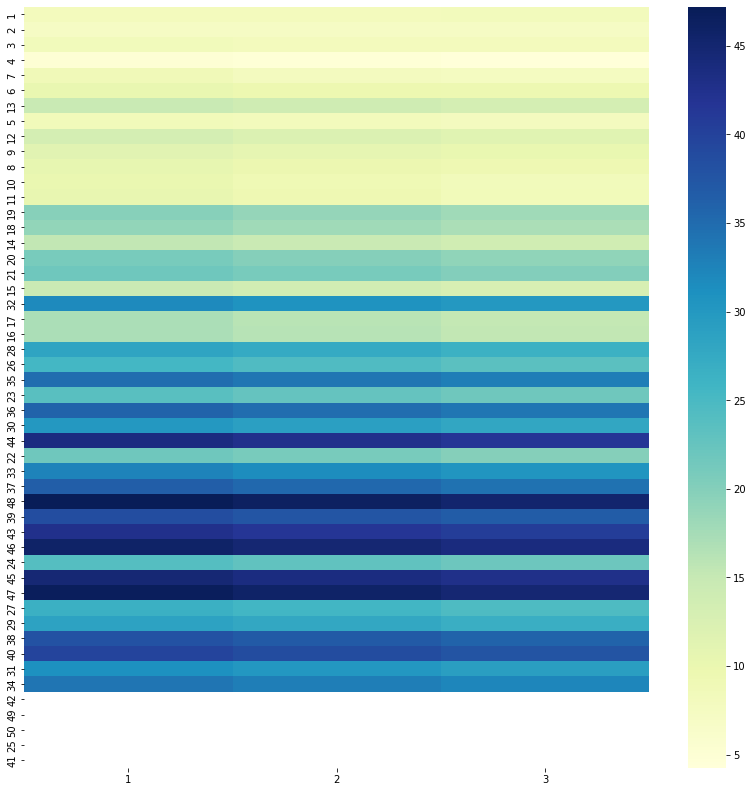

In [128]:
get_heatmap(sim_mat.T)

### Using all of the data

In [131]:
directory_list = []
dirs = []
root = None

for root, dirs, files in os.walk("/content/drive/My Drive/Colab Notebooks/Transfer learning project/UCR_TS_Archive_2015/", topdown=False):
    for name in dirs:
        directory_list.append(files)


dataset_list = []
for dataset in dirs:
    dataset_list.append(dataset + "/" + dataset + "_TRAIN")

data_dic = {}
for data_name in dataset_list:
  temp = pd.read_csv(data_name, header=None)
  data_dic[data_name.split("/")[0]] = temp

0


In [132]:
data_dic['50words']

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,9,-0.79042,-0.76517,-0.73354,-0.69963,-0.667740,-0.638630,-0.611810,-0.58728,-0.56430,...,-0.592320,-0.62175,-0.65471,-0.69032,-0.72764,-0.76425,-0.79486,-0.81473,-0.82271,-0.82133
1,18,-0.76406,-0.74445,-0.74379,-0.72095,-0.717990,-0.702820,-0.691820,-0.68080,-0.67143,...,-0.528000,-0.45393,-0.36532,-0.31180,-0.33682,-0.42908,-0.53464,-0.62984,-0.71135,-0.77447
2,1,-0.81704,-0.73310,-0.62782,-0.49572,-0.334890,-0.143280,0.077817,0.32273,0.58623,...,-0.905360,-0.90961,-0.91489,-0.92182,-0.93115,-0.94213,-0.95220,-0.95905,-0.96174,-0.96086
3,5,-1.10380,-1.07120,-1.02490,-0.96729,-0.905160,-0.844320,-0.783510,-0.72085,-0.65855,...,-0.953410,-0.97466,-1.00060,-1.03150,-1.06480,-1.09560,-1.11900,-1.13240,-1.13590,-1.13270
4,4,-0.43600,-0.31636,-0.21170,-0.11485,-0.019499,0.070713,0.143290,0.19343,0.22683,...,-0.049013,-0.16300,-0.26418,-0.34839,-0.40883,-0.44638,-0.47558,-0.51647,-0.57994,-0.65041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,4,-0.77514,-0.74833,-0.71346,-0.67070,-0.620840,-0.565580,-0.507200,-0.44698,-0.38635,...,-0.809630,-0.81141,-0.81349,-0.81523,-0.81659,-0.81758,-0.81842,-0.81880,-0.81867,-0.81827
446,15,-1.34760,-1.26490,-1.16690,-1.05410,-0.928060,-0.790850,-0.645160,-0.49439,-0.34177,...,-1.506000,-1.52810,-1.54580,-1.55900,-1.56860,-1.57510,-1.57730,-1.57630,-1.57330,-1.56950
447,2,-0.84612,-0.84237,-0.83697,-0.83061,-0.824130,-0.818270,-0.813310,-0.80916,-0.80552,...,-0.620870,-0.66184,-0.69731,-0.72813,-0.75412,-0.77633,-0.79584,-0.81347,-0.82807,-0.83906
448,5,-0.94585,-0.93473,-0.91897,-0.89928,-0.882130,-0.869320,-0.857060,-0.84437,-0.83262,...,-0.845320,-0.85564,-0.86840,-0.88505,-0.90522,-0.92590,-0.94304,-0.95366,-0.95704,-0.95504


In [133]:
bary_all_data = {}
for name, dt in zip(data_dic.keys(), data_dic.values()):
  bary_all_data[name] = get_barycenter_per_class(dt)

In [134]:
# Takes forever to compute - so we can just save the dictionary and use the get_similarity() function for any two combination of source and target daaset 
# dataset_combo = {}
# for key1 in bary_all_data.keys():
#   for key2 in bary_all_data.keys():
#   dataset_combo[key1 + key2] = get_similarity(bary_all_data[key1], bary_all_data[2])

In [137]:
import pickle

with open('bary_all_data.p', 'wb') as fp:
    pickle.dump(bary_all_data, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [138]:
# with open('data.p', 'rb') as fp:
#     data = pickle.load(fp)